In [3]:
import pandas as pd
data=pd.read_csv("D:\\DATA SCIENCE\\Data sets\\day13\\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [5]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

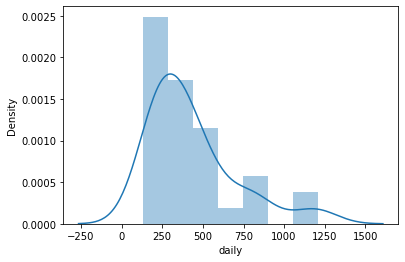

In [6]:
import seaborn as sns
sns.distplot(data['daily'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

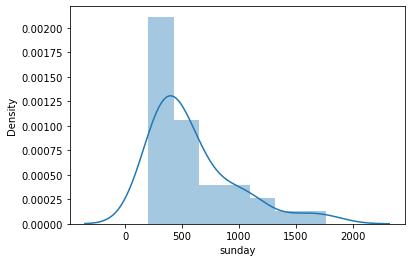

In [7]:
sns.distplot(data['sunday'])

In [8]:
import statsmodels.formula.api as smf
model=smf.ols('sunday~daily',data=data).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

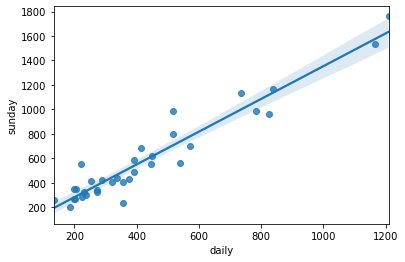

In [9]:
sns.regplot(x='daily',y='sunday',data=data)

In [10]:
#summary and coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           6.02e-19
Time:                        13:57:46   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

## Predict for new data points

In [28]:
# predict for 200 and 300 new data points
newdata=pd.Series([200,300])
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [29]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [30]:
newdata=pd.Series([238.55,300])
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [31]:
model.predict(data_pred)

0    333.424585
1    415.750057
dtype: float64

In [32]:
#finding error
x=238.55;y=299.45
x=238.55;y_hat=333.42
error=y-y_hat

In [20]:
error

-33.97000000000003

In [23]:
beta0=13.8356;beta1=1.3397
y_hat=beta0 + beta1*x + error 

In [24]:
y_hat

299.45103499999993

## The Waist Circumference - Adipose Tissue

In [33]:
wc_at=pd.read_csv("D:\\DATA SCIENCE\\Data sets\\day13\\WC_AT.csv")
wc_at.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [35]:
wc_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [36]:
wc_at.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<AxesSubplot:xlabel='Waist', ylabel='Density'>

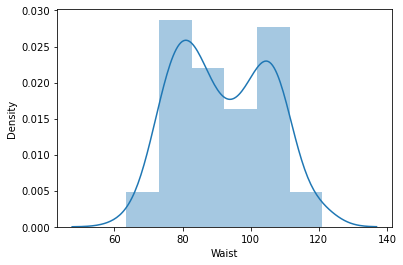

In [38]:
sns.distplot(wc_at['Waist'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

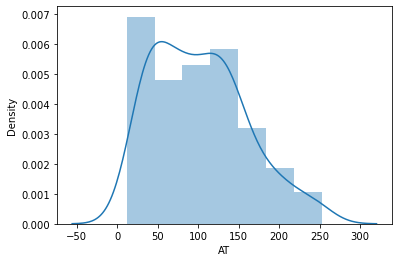

In [39]:
sns.distplot(wc_at['AT'])

In [40]:
import statsmodels.formula.api as smf
model=smf.ols('AT~Waist',data=wc_at).fit()

<AxesSubplot:xlabel='Waist', ylabel='AT'>

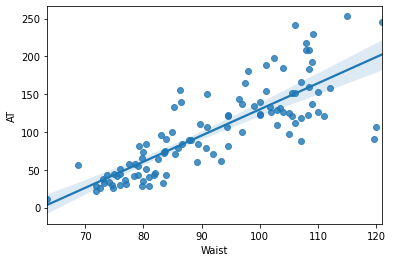

In [41]:
sns.regplot(x='Waist',y='AT',data=wc_at)

In [42]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [43]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [44]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.62e-27
Time:                        14:44:03   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predict for new data points

In [48]:
newdata=pd.Series([75,85,90])
data_pred=pd.DataFrame(newdata,columns=['Waist'])
model.predict(data_pred)

0    43.432966
1    78.021560
2    95.315857
dtype: float64